In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [6]:
model = Sequential([
    # Input Layer: Flattens 28x28 image into a 784 vector (1D array)
    Flatten(input_shape=(28, 28)),

    # Hidden Layer 1: 128 Neurons, ReLU activation helps learn patterns
    Dense(128, activation='relu'),

    # Hidden Layer 2: 64 Neurons (Optional, adds depth)
    Dense(64, activation='relu'),

    # Output Layer: 10 Neurons (digits 0-9), Softmax converts to probability
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 4. Train Model
history = model.fit(x_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=64)

# 5. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("📌 ANN Model Test Accuracy:", round(test_acc * 100, 2), "%")


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8513 - loss: 0.5278 - val_accuracy: 0.9653 - val_loss: 0.1244
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9637 - loss: 0.1196 - val_accuracy: 0.9742 - val_loss: 0.0925
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9770 - loss: 0.0761 - val_accuracy: 0.9728 - val_loss: 0.0874
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9839 - loss: 0.0539 - val_accuracy: 0.9772 - val_loss: 0.0753
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9868 - loss: 0.0430 - val_accuracy: 0.9723 - val_loss: 0.0857
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9892 - loss: 0.0350 - val_accuracy: 0.9785 - val_loss: 0.0705
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9762 - val_loss: 0.0864
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9928 - loss: 0.0234 - val_accuracy: 0.

In [9]:

# 6. Confusion Matrix (Good for presentation visuals)
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


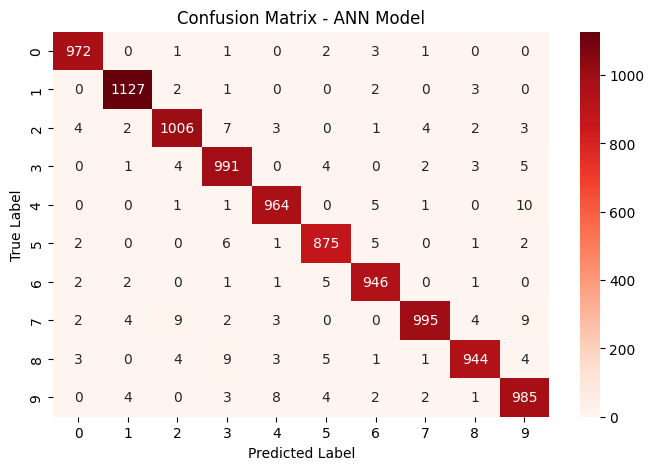

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix - ANN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

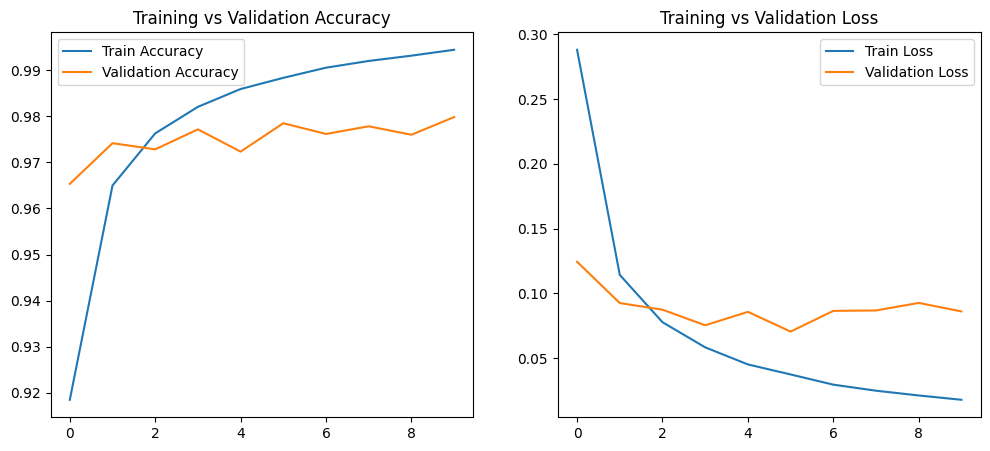

In [13]:
# --- Plot A: Training Performance (Accuracy & Loss) ---
plt.figure(figsize=(12,5))

# Accuracy Curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss Curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()

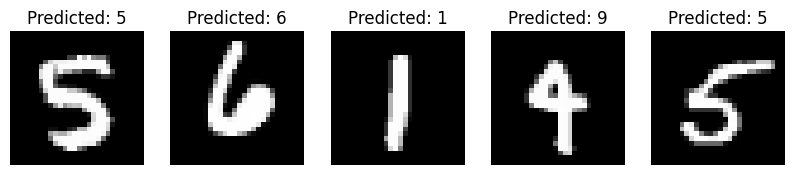

In [14]:

# --- Plot C: Sample Predictions (Visualizing Test Images) ---
num_samples = 5
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(10,3))
for i, idx in enumerate(indices):
    img = x_test[idx] # Shape is (28, 28)
    pred = y_pred[idx] # The prediction we calculated earlier

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred}")
    plt.axis("off")

plt.show()

In [15]:
# 6.SAVE MODEL
model.save("ann_model.h5")
print("✅ ANN Model saved as ann_model.h5")

✅ ANN Model saved as ann_model.h5
